In [0]:
# [정보]_평가지표(AUC)_계산함수분석.ipynb

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 0, 0])
# pred = np.array([0.1, 0.4, 0.35, 0.8, 0.1])
pred = np.array([0.9, 0.6, 0.1, 0.4])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
metrics.auc(fpr, tpr)

1.0

In [0]:
thresholds

In [0]:
thresholds

array([1.9, 0.9, 0.6, 0.1])

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


In [0]:
y_test[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [0]:
y_test.ravel()

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0])

In [0]:
y_score[:5]

array([[-0.76301132, -0.36482547,  0.12386354],
       [-0.20224493, -0.63144366, -0.16612302],
       [ 0.11801481, -0.80263073, -0.32055874],
       [-0.90780855, -0.12395478,  0.02199789],
       [-0.01116192, -0.27913475, -0.71889214]])

In [0]:
y_score.ravel()

array([-0.76301132, -0.36482547,  0.12386354, -0.20224493, -0.63144366,
       -0.16612302,  0.11801481, -0.80263073, -0.32055874, -0.90780855,
       -0.12395478,  0.02199789, -0.01116192, -0.27913475, -0.71889214,
       -0.6048727 , -0.34730509, -0.05859016,  0.02283491, -0.24506467,
       -0.79111998, -0.61076876,  0.18264917, -0.57199363, -0.37572754,
       -0.24059516, -0.38933694, -0.47017411, -0.25745136, -0.27510839,
       -0.42224234, -0.30270719, -0.27995197, -0.3355867 , -0.7030665 ,
        0.02530178, -0.22723929, -0.64062258, -0.13456902, -0.07856729,
       -0.46354017, -0.45918364, -0.53383361, -0.2653183 , -0.20023832,
        0.12163662, -0.56706353, -0.56980985, -0.71356947, -0.04226738,
       -0.24297128, -0.55111511, -0.13784913, -0.31370595,  0.37991331,
       -0.99673302, -0.39090964, -0.11107635, -0.91349462,  0.03129167,
       -0.70713712, -0.06436533, -0.21423788, -0.02392675, -0.45906496,
       -0.51922684, -0.25045747, -0.80086123,  0.04121338,  0.12

# fpr[2], tpr[2] 값 확인

In [0]:
import pandas as pd
df_fpr_tpr = pd.DataFrame([[item[0], item[1]] for item in zip(fpr[2], tpr[2])])
df_fpr_tpr.head()

,0,1
0,0.000000,0.000000
1,0.000000,0.041667
2,0.000000,0.125000
3,0.019608,0.125000
4,0.019608,0.250000


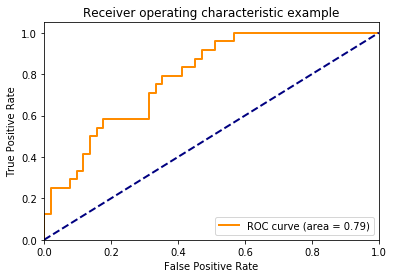

In [0]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2    # lw: line width, plot의 선 굵기
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# threshold에 따른 비교

In [18]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

def show_ROC():
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], thresholds = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    import matplotlib.pyplot as plt

    plt.figure()
    lw = 2    # lw: line width, plot의 선 굵기
    plt.plot(fpr[2], tpr[2], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Automatically created module for IPython interactive environment


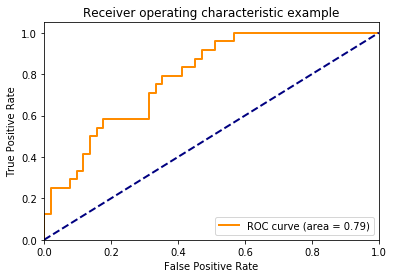

# sklearn 의 auc 계산 모듈 클래스를 분석해본다.

In [0]:
"""Metrics to assess performance on classification task given scores

Functions named as ``*_score`` return a scalar value to maximize: the higher
the better

Function named as ``*_error`` or ``*_loss`` return a scalar value to minimize:
the lower the better
"""

# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Arnaud Joly <a.joly@ulg.ac.be>
#          Jochen Wersdorfer <jochen@wersdoerfer.de>
#          Lars Buitinck
#          Joel Nothman <joel.nothman@gmail.com>
#          Noel Dawe <noel@dawe.me>
# License: BSD 3 clause


import warnings
from functools import partial

import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import rankdata

from ..utils import assert_all_finite
from ..utils import check_consistent_length
from ..utils import column_or_1d, check_array
from ..utils.multiclass import type_of_target
from ..utils.extmath import stable_cumsum
from ..utils.sparsefuncs import count_nonzero
from ..exceptions import UndefinedMetricWarning
from ..preprocessing import label_binarize

from .base import _average_binary_score


def auc(x, y, reorder='deprecated'):
    """Compute Area Under the Curve (AUC) using the trapezoidal rule

    This is a general function, given points on a curve.  For computing the
    area under the ROC-curve, see :func:`roc_auc_score`.  For an alternative
    way to summarize a precision-recall curve, see
    :func:`average_precision_score`.

    Parameters
    ----------
    x : array, shape = [n]
        x coordinates. These must be either monotonic increasing or monotonic
        decreasing.
    y : array, shape = [n]
        y coordinates.
    reorder : boolean, optional (default='deprecated')
        Whether to sort x before computing. If False, assume that x must be
        either monotonic increasing or monotonic decreasing. If True, y is
        used to break ties when sorting x. Make sure that y has a monotonic
        relation to x when setting reorder to True.

        .. deprecated:: 0.20
           Parameter ``reorder`` has been deprecated in version 0.20 and will
           be removed in 0.22. It's introduced for roc_auc_score (not for
           general use) and is no longer used there. What's more, the result
           from auc will be significantly influenced if x is sorted
           unexpectedly due to slight floating point error (See issue #9786).
           Future (and default) behavior is equivalent to ``reorder=False``.

    Returns
    -------
    auc : float

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn import metrics
    >>> y = np.array([1, 1, 2, 2])
    >>> pred = np.array([0.1, 0.4, 0.35, 0.8])
    >>> fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
    >>> metrics.auc(fpr, tpr)
    0.75

    See also
    --------
    roc_auc_score : Compute the area under the ROC curve
    average_precision_score : Compute average precision from prediction scores
    precision_recall_curve :
        Compute precision-recall pairs for different probability thresholds
    """
    check_consistent_length(x, y)
    x = column_or_1d(x)
    y = column_or_1d(y)

    if x.shape[0] < 2:
        raise ValueError('At least 2 points are needed to compute'
                         ' area under curve, but x.shape = %s' % x.shape)

    if reorder != 'deprecated':
        warnings.warn("The 'reorder' parameter has been deprecated in "
                      "version 0.20 and will be removed in 0.22. It is "
                      "recommended not to set 'reorder' and ensure that x "
                      "is monotonic increasing or monotonic decreasing.",
                      DeprecationWarning)

    direction = 1
    if reorder is True:
        # reorder the data points according to the x axis and using y to
        # break ties
        order = np.lexsort((y, x))
        x, y = x[order], y[order]
    else:
        dx = np.diff(x)
        if np.any(dx < 0):
            if np.all(dx <= 0):
                direction = -1
            else:
                raise ValueError("x is neither increasing nor decreasing "
                                 ": {}.".format(x))

    area = direction * np.trapz(y, x)
    if isinstance(area, np.memmap):
        # Reductions such as .sum used internally in np.trapz do not return a
        # scalar by default for numpy.memmap instances contrary to
        # regular numpy.ndarray instances.
        area = area.dtype.type(area)
    return area


def average_precision_score(y_true, y_score, average="macro", pos_label=1,
                            sample_weight=None):
    """Compute average precision (AP) from prediction scores

    AP summarizes a precision-recall curve as the weighted mean of precisions
    achieved at each threshold, with the increase in recall from the previous
    threshold used as the weight:

    .. math::
        \\text{AP} = \\sum_n (R_n - R_{n-1}) P_n

    where :math:`P_n` and :math:`R_n` are the precision and recall at the nth
    threshold [1]_. This implementation is not interpolated and is different
    from computing the area under the precision-recall curve with the
    trapezoidal rule, which uses linear interpolation and can be too
    optimistic.

    Note: this implementation is restricted to the binary classification task
    or multilabel classification task.

    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

    Parameters
    ----------
    y_true : array, shape = [n_samples] or [n_samples, n_classes]
        True binary labels or binary label indicators.

    y_score : array, shape = [n_samples] or [n_samples, n_classes]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).

    average : string, [None, 'micro', 'macro' (default), 'samples', 'weighted']
        If ``None``, the scores for each class are returned. Otherwise,
        this determines the type of averaging performed on the data:

        ``'micro'``:
            Calculate metrics globally by considering each element of the label
            indicator matrix as a label.
        ``'macro'``:
            Calculate metrics for each label, and find their unweighted
            mean.  This does not take label imbalance into account.
        ``'weighted'``:
            Calculate metrics for each label, and find their average, weighted
            by support (the number of true instances for each label).
        ``'samples'``:
            Calculate metrics for each instance, and find their average.

        Will be ignored when ``y_true`` is binary.

    pos_label : int or str (default=1)
        The label of the positive class. Only applied to binary ``y_true``.
        For multilabel-indicator ``y_true``, ``pos_label`` is fixed to 1.

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    Returns
    -------
    average_precision : float

    References
    ----------
    .. [1] `Wikipedia entry for the Average precision
           <https://en.wikipedia.org/w/index.php?title=Information_retrieval&
           oldid=793358396#Average_precision>`_

    See also
    --------
    roc_auc_score : Compute the area under the ROC curve

    precision_recall_curve :
        Compute precision-recall pairs for different probability thresholds

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.metrics import average_precision_score
    >>> y_true = np.array([0, 0, 1, 1])
    >>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
    >>> average_precision_score(y_true, y_scores)  # doctest: +ELLIPSIS
    0.83...

    Notes
    -----
    .. versionchanged:: 0.19
      Instead of linearly interpolating between operating points, precisions
      are weighted by the change in recall since the last operating point.
    """
    def _binary_uninterpolated_average_precision(
            y_true, y_score, pos_label=1, sample_weight=None):
        precision, recall, _ = precision_recall_curve(
            y_true, y_score, pos_label=pos_label, sample_weight=sample_weight)
        # Return the step function integral
        # The following works because the last entry of precision is
        # guaranteed to be 1, as returned by precision_recall_curve
        return -np.sum(np.diff(recall) * np.array(precision)[:-1])

    y_type = type_of_target(y_true)
    if y_type == "multilabel-indicator" and pos_label != 1:
        raise ValueError("Parameter pos_label is fixed to 1 for "
                         "multilabel-indicator y_true. Do not set "
                         "pos_label or set pos_label to 1.")
    elif y_type == "binary":
        present_labels = np.unique(y_true)
        if len(present_labels) == 2 and pos_label not in present_labels:
            raise ValueError("pos_label=%r is invalid. Set it to a label in "
                             "y_true." % pos_label)
    average_precision = partial(_binary_uninterpolated_average_precision,
                                pos_label=pos_label)
    return _average_binary_score(average_precision, y_true, y_score,
                                 average, sample_weight=sample_weight)


def roc_auc_score(y_true, y_score, average="macro", sample_weight=None,
                  max_fpr=None):
    """Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.

    Note: this implementation is restricted to the binary classification task
    or multilabel classification task in label indicator format.

    Read more in the :ref:`User Guide <roc_metrics>`.

    Parameters
    ----------
    y_true : array, shape = [n_samples] or [n_samples, n_classes]
        True binary labels or binary label indicators.

    y_score : array, shape = [n_samples] or [n_samples, n_classes]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers). For binary
        y_true, y_score is supposed to be the score of the class with greater
        label.

    average : string, [None, 'micro', 'macro' (default), 'samples', 'weighted']
        If ``None``, the scores for each class are returned. Otherwise,
        this determines the type of averaging performed on the data:

        ``'micro'``:
            Calculate metrics globally by considering each element of the label
            indicator matrix as a label.
        ``'macro'``:
            Calculate metrics for each label, and find their unweighted
            mean.  This does not take label imbalance into account.
        ``'weighted'``:
            Calculate metrics for each label, and find their average, weighted
            by support (the number of true instances for each label).
        ``'samples'``:
            Calculate metrics for each instance, and find their average.

        Will be ignored when ``y_true`` is binary.

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    max_fpr : float > 0 and <= 1, optional
        If not ``None``, the standardized partial AUC [3]_ over the range
        [0, max_fpr] is returned.

    Returns
    -------
    auc : float

    References
    ----------
    .. [1] `Wikipedia entry for the Receiver operating characteristic
            <https://en.wikipedia.org/wiki/Receiver_operating_characteristic>`_

    .. [2] Fawcett T. An introduction to ROC analysis[J]. Pattern Recognition
           Letters, 2006, 27(8):861-874.

    .. [3] `Analyzing a portion of the ROC curve. McClish, 1989
            <https://www.ncbi.nlm.nih.gov/pubmed/2668680>`_

    See also
    --------
    average_precision_score : Area under the precision-recall curve

    roc_curve : Compute Receiver operating characteristic (ROC) curve

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.metrics import roc_auc_score
    >>> y_true = np.array([0, 0, 1, 1])
    >>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
    >>> roc_auc_score(y_true, y_scores)
    0.75

    """
    def _binary_roc_auc_score(y_true, y_score, sample_weight=None):
        if len(np.unique(y_true)) != 2:
            raise ValueError("Only one class present in y_true. ROC AUC score "
                             "is not defined in that case.")

        fpr, tpr, _ = roc_curve(y_true, y_score,
                                sample_weight=sample_weight)
        if max_fpr is None or max_fpr == 1:
            return auc(fpr, tpr)
        if max_fpr <= 0 or max_fpr > 1:
            raise ValueError("Expected max_fpr in range (0, 1], got: %r"
                             % max_fpr)

        # Add a single point at max_fpr by linear interpolation
        stop = np.searchsorted(fpr, max_fpr, 'right')
        x_interp = [fpr[stop - 1], fpr[stop]]
        y_interp = [tpr[stop - 1], tpr[stop]]
        tpr = np.append(tpr[:stop], np.interp(max_fpr, x_interp, y_interp))
        fpr = np.append(fpr[:stop], max_fpr)
        partial_auc = auc(fpr, tpr)

        # McClish correction: standardize result to be 0.5 if non-discriminant
        # and 1 if maximal
        min_area = 0.5 * max_fpr**2
        max_area = max_fpr
        return 0.5 * (1 + (partial_auc - min_area) / (max_area - min_area))

    y_type = type_of_target(y_true)
    if y_type == "binary":
        labels = np.unique(y_true)
        y_true = label_binarize(y_true, labels)[:, 0]

    return _average_binary_score(
        _binary_roc_auc_score, y_true, y_score, average,
        sample_weight=sample_weight)


def _binary_clf_curve(y_true, y_score, pos_label=None, sample_weight=None):
    """Calculate true and false positives per binary classification threshold.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        True targets of binary classification

    y_score : array, shape = [n_samples]
        Estimated probabilities or decision function

    pos_label : int or str, default=None
        The label of the positive class

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    Returns
    -------
    fps : array, shape = [n_thresholds]
        A count of false positives, at index i being the number of negative
        samples assigned a score >= thresholds[i]. The total number of
        negative samples is equal to fps[-1] (thus true negatives are given by
        fps[-1] - fps).

    tps : array, shape = [n_thresholds <= len(np.unique(y_score))]
        An increasing count of true positives, at index i being the number
        of positive samples assigned a score >= thresholds[i]. The total
        number of positive samples is equal to tps[-1] (thus false negatives
        are given by tps[-1] - tps).

    thresholds : array, shape = [n_thresholds]
        Decreasing score values.
    """
    # Check to make sure y_true is valid
    y_type = type_of_target(y_true)
    if not (y_type == "binary" or
            (y_type == "multiclass" and pos_label is not None)):
        raise ValueError("{0} format is not supported".format(y_type))

    check_consistent_length(y_true, y_score, sample_weight)
    y_true = column_or_1d(y_true)
    y_score = column_or_1d(y_score)
    assert_all_finite(y_true)
    assert_all_finite(y_score)

    if sample_weight is not None:
        sample_weight = column_or_1d(sample_weight)

    # ensure binary classification if pos_label is not specified
    classes = np.unique(y_true)
    if (pos_label is None and
        not (np.array_equal(classes, [0, 1]) or
             np.array_equal(classes, [-1, 1]) or
             np.array_equal(classes, [0]) or
             np.array_equal(classes, [-1]) or
             np.array_equal(classes, [1]))):
        raise ValueError("Data is not binary and pos_label is not specified")
    elif pos_label is None:
        pos_label = 1.

    # make y_true a boolean vector
    y_true = (y_true == pos_label)

    # sort scores and corresponding truth values
    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]
    if sample_weight is not None:
        weight = sample_weight[desc_score_indices]
    else:
        weight = 1.

    # y_score typically has many tied values. Here we extract
    # the indices associated with the distinct values. We also
    # concatenate a value for the end of the curve.
    distinct_value_indices = np.where(np.diff(y_score))[0]
    threshold_idxs = np.r_[distinct_value_indices, y_true.size - 1]

    # accumulate the true positives with decreasing threshold
    tps = stable_cumsum(y_true * weight)[threshold_idxs]
    if sample_weight is not None:
        # express fps as a cumsum to ensure fps is increasing even in
        # the presence of floating point errors
        fps = stable_cumsum((1 - y_true) * weight)[threshold_idxs]
    else:
        fps = 1 + threshold_idxs - tps
    return fps, tps, y_score[threshold_idxs]


def precision_recall_curve(y_true, probas_pred, pos_label=None,
                           sample_weight=None):
    """Compute precision-recall pairs for different probability thresholds

    Note: this implementation is restricted to the binary classification task.

    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.

    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.

    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold.  This ensures that the graph starts on the
    y axis.

    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.

    probas_pred : array, shape = [n_samples]
        Estimated probabilities or decision function.

    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
        ``pos_label`` is set to 1, otherwise an error will be raised.

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    Returns
    -------
    precision : array, shape = [n_thresholds + 1]
        Precision values such that element i is the precision of
        predictions with score >= thresholds[i] and the last element is 1.

    recall : array, shape = [n_thresholds + 1]
        Decreasing recall values such that element i is the recall of
        predictions with score >= thresholds[i] and the last element is 0.

    thresholds : array, shape = [n_thresholds <= len(np.unique(probas_pred))]
        Increasing thresholds on the decision function used to compute
        precision and recall.

    See also
    --------
    average_precision_score : Compute average precision from prediction scores

    roc_curve : Compute Receiver operating characteristic (ROC) curve

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.metrics import precision_recall_curve
    >>> y_true = np.array([0, 0, 1, 1])
    >>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
    >>> precision, recall, thresholds = precision_recall_curve(
    ...     y_true, y_scores)
    >>> precision  # doctest: +ELLIPSIS
    array([0.66666667, 0.5       , 1.        , 1.        ])
    >>> recall
    array([1. , 0.5, 0.5, 0. ])
    >>> thresholds
    array([0.35, 0.4 , 0.8 ])

    """
    fps, tps, thresholds = _binary_clf_curve(y_true, probas_pred,
                                             pos_label=pos_label,
                                             sample_weight=sample_weight)

    precision = tps / (tps + fps)
    precision[np.isnan(precision)] = 0
    recall = tps / tps[-1]

    # stop when full recall attained
    # and reverse the outputs so recall is decreasing
    last_ind = tps.searchsorted(tps[-1])
    sl = slice(last_ind, None, -1)
    return np.r_[precision[sl], 1], np.r_[recall[sl], 0], thresholds[sl]


def roc_curve(y_true, y_score, pos_label=None, sample_weight=None,
              drop_intermediate=True):
    """Compute Receiver operating characteristic (ROC)

    Note: this implementation is restricted to the binary classification task.

    Read more in the :ref:`User Guide <roc_metrics>`.

    Parameters
    ----------

    y_true : array, shape = [n_samples]
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.

    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).

    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
        ``pos_label`` is set to 1, otherwise an error will be raised.

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    drop_intermediate : boolean, optional (default=True)
        Whether to drop some suboptimal thresholds which would not appear
        on a plotted ROC curve. This is useful in order to create lighter
        ROC curves.

        .. versionadded:: 0.17
           parameter *drop_intermediate*.

    Returns
    -------
    fpr : array, shape = [>2]
        Increasing false positive rates such that element i is the false
        positive rate of predictions with score >= thresholds[i].

    tpr : array, shape = [>2]
        Increasing true positive rates such that element i is the true
        positive rate of predictions with score >= thresholds[i].

    thresholds : array, shape = [n_thresholds]
        Decreasing thresholds on the decision function used to compute
        fpr and tpr. `thresholds[0]` represents no instances being predicted
        and is arbitrarily set to `max(y_score) + 1`.

    See also
    --------
    roc_auc_score : Compute the area under the ROC curve

    Notes
    -----
    Since the thresholds are sorted from low to high values, they
    are reversed upon returning them to ensure they correspond to both ``fpr``
    and ``tpr``, which are sorted in reversed order during their calculation.

    References
    ----------
    .. [1] `Wikipedia entry for the Receiver operating characteristic
            <https://en.wikipedia.org/wiki/Receiver_operating_characteristic>`_

    .. [2] Fawcett T. An introduction to ROC analysis[J]. Pattern Recognition
           Letters, 2006, 27(8):861-874.

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn import metrics
    >>> y = np.array([1, 1, 2, 2])
    >>> scores = np.array([0.1, 0.4, 0.35, 0.8])
    >>> fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
    >>> fpr
    array([0. , 0. , 0.5, 0.5, 1. ])
    >>> tpr
    array([0. , 0.5, 0.5, 1. , 1. ])
    >>> thresholds
    array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

    """
    fps, tps, thresholds = _binary_clf_curve(
        y_true, y_score, pos_label=pos_label, sample_weight=sample_weight)

    # Attempt to drop thresholds corresponding to points in between and
    # collinear with other points. These are always suboptimal and do not
    # appear on a plotted ROC curve (and thus do not affect the AUC).
    # Here np.diff(_, 2) is used as a "second derivative" to tell if there
    # is a corner at the point. Both fps and tps must be tested to handle
    # thresholds with multiple data points (which are combined in
    # _binary_clf_curve). This keeps all cases where the point should be kept,
    # but does not drop more complicated cases like fps = [1, 3, 7],
    # tps = [1, 2, 4]; there is no harm in keeping too many thresholds.
    if drop_intermediate and len(fps) > 2:
        optimal_idxs = np.where(np.r_[True,
                                      np.logical_or(np.diff(fps, 2),
                                                    np.diff(tps, 2)),
                                      True])[0]
        fps = fps[optimal_idxs]
        tps = tps[optimal_idxs]
        thresholds = thresholds[optimal_idxs]

    # Add an extra threshold position
    # to make sure that the curve starts at (0, 0)
    tps = np.r_[0, tps]
    fps = np.r_[0, fps]
    thresholds = np.r_[thresholds[0] + 1, thresholds]

    if fps[-1] <= 0:
        warnings.warn("No negative samples in y_true, "
                      "false positive value should be meaningless",
                      UndefinedMetricWarning)
        fpr = np.repeat(np.nan, fps.shape)
    else:
        fpr = fps / fps[-1]

    if tps[-1] <= 0:
        warnings.warn("No positive samples in y_true, "
                      "true positive value should be meaningless",
                      UndefinedMetricWarning)
        tpr = np.repeat(np.nan, tps.shape)
    else:
        tpr = tps / tps[-1]

    return fpr, tpr, thresholds


def label_ranking_average_precision_score(y_true, y_score, sample_weight=None):
    """Compute ranking-based average precision

    Label ranking average precision (LRAP) is the average over each ground
    truth label assigned to each sample, of the ratio of true vs. total
    labels with lower score.

    This metric is used in multilabel ranking problem, where the goal
    is to give better rank to the labels associated to each sample.

    The obtained score is always strictly greater than 0 and
    the best value is 1.

    Read more in the :ref:`User Guide <label_ranking_average_precision>`.

    Parameters
    ----------
    y_true : array or sparse matrix, shape = [n_samples, n_labels]
        True binary labels in binary indicator format.

    y_score : array, shape = [n_samples, n_labels]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    Returns
    -------
    score : float

    Examples
    --------
    >>> import numpy as np
    >>> from sklearn.metrics import label_ranking_average_precision_score
    >>> y_true = np.array([[1, 0, 0], [0, 0, 1]])
    >>> y_score = np.array([[0.75, 0.5, 1], [1, 0.2, 0.1]])
    >>> label_ranking_average_precision_score(y_true, y_score) \
        # doctest: +ELLIPSIS
    0.416...

    """
    check_consistent_length(y_true, y_score, sample_weight)
    y_true = check_array(y_true, ensure_2d=False)
    y_score = check_array(y_score, ensure_2d=False)

    if y_true.shape != y_score.shape:
        raise ValueError("y_true and y_score have different shape")

    # Handle badly formatted array and the degenerate case with one label
    y_type = type_of_target(y_true)
    if (y_type != "multilabel-indicator" and
            not (y_type == "binary" and y_true.ndim == 2)):
        raise ValueError("{0} format is not supported".format(y_type))

    y_true = csr_matrix(y_true)
    y_score = -y_score

    n_samples, n_labels = y_true.shape

    out = 0.
    for i, (start, stop) in enumerate(zip(y_true.indptr, y_true.indptr[1:])):
        relevant = y_true.indices[start:stop]

        if (relevant.size == 0 or relevant.size == n_labels):
            # If all labels are relevant or unrelevant, the score is also
            # equal to 1. The label ranking has no meaning.
            aux = 1.
        else:
            scores_i = y_score[i]
            rank = rankdata(scores_i, 'max')[relevant]
            L = rankdata(scores_i[relevant], 'max')
            aux = (L / rank).mean()

        if sample_weight is not None:
            aux = aux * sample_weight[i]
        out += aux

    if sample_weight is None:
        out /= n_samples
    else:
        out /= np.sum(sample_weight)

    return out


def coverage_error(y_true, y_score, sample_weight=None):
    """Coverage error measure

    Compute how far we need to go through the ranked scores to cover all
    true labels. The best value is equal to the average number
    of labels in ``y_true`` per sample.

    Ties in ``y_scores`` are broken by giving maximal rank that would have
    been assigned to all tied values.

    Note: Our implementation's score is 1 greater than the one given in
    Tsoumakas et al., 2010. This extends it to handle the degenerate case
    in which an instance has 0 true labels.

    Read more in the :ref:`User Guide <coverage_error>`.

    Parameters
    ----------
    y_true : array, shape = [n_samples, n_labels]
        True binary labels in binary indicator format.

    y_score : array, shape = [n_samples, n_labels]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    Returns
    -------
    coverage_error : float

    References
    ----------
    .. [1] Tsoumakas, G., Katakis, I., & Vlahavas, I. (2010).
           Mining multi-label data. In Data mining and knowledge discovery
           handbook (pp. 667-685). Springer US.

    """
    y_true = check_array(y_true, ensure_2d=False)
    y_score = check_array(y_score, ensure_2d=False)
    check_consistent_length(y_true, y_score, sample_weight)

    y_type = type_of_target(y_true)
    if y_type != "multilabel-indicator":
        raise ValueError("{0} format is not supported".format(y_type))

    if y_true.shape != y_score.shape:
        raise ValueError("y_true and y_score have different shape")

    y_score_mask = np.ma.masked_array(y_score, mask=np.logical_not(y_true))
    y_min_relevant = y_score_mask.min(axis=1).reshape((-1, 1))
    coverage = (y_score >= y_min_relevant).sum(axis=1)
    coverage = coverage.filled(0)

    return np.average(coverage, weights=sample_weight)


def label_ranking_loss(y_true, y_score, sample_weight=None):
    """Compute Ranking loss measure

    Compute the average number of label pairs that are incorrectly ordered
    given y_score weighted by the size of the label set and the number of
    labels not in the label set.

    This is similar to the error set size, but weighted by the number of
    relevant and irrelevant labels. The best performance is achieved with
    a ranking loss of zero.

    Read more in the :ref:`User Guide <label_ranking_loss>`.

    .. versionadded:: 0.17
       A function *label_ranking_loss*

    Parameters
    ----------
    y_true : array or sparse matrix, shape = [n_samples, n_labels]
        True binary labels in binary indicator format.

    y_score : array, shape = [n_samples, n_labels]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).

    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.

    Returns
    -------
    loss : float

    References
    ----------
    .. [1] Tsoumakas, G., Katakis, I., & Vlahavas, I. (2010).
           Mining multi-label data. In Data mining and knowledge discovery
           handbook (pp. 667-685). Springer US.

    """
    y_true = check_array(y_true, ensure_2d=False, accept_sparse='csr')
    y_score = check_array(y_score, ensure_2d=False)
    check_consistent_length(y_true, y_score, sample_weight)

    y_type = type_of_target(y_true)
    if y_type not in ("multilabel-indicator",):
        raise ValueError("{0} format is not supported".format(y_type))

    if y_true.shape != y_score.shape:
        raise ValueError("y_true and y_score have different shape")

    n_samples, n_labels = y_true.shape

    y_true = csr_matrix(y_true)

    loss = np.zeros(n_samples)
    for i, (start, stop) in enumerate(zip(y_true.indptr, y_true.indptr[1:])):
        # Sort and bin the label scores
        unique_scores, unique_inverse = np.unique(y_score[i],
                                                  return_inverse=True)
        true_at_reversed_rank = np.bincount(
            unique_inverse[y_true.indices[start:stop]],
            minlength=len(unique_scores))
        all_at_reversed_rank = np.bincount(unique_inverse,
                                        minlength=len(unique_scores))
        false_at_reversed_rank = all_at_reversed_rank - true_at_reversed_rank

        # if the scores are ordered, it's possible to count the number of
        # incorrectly ordered paires in linear time by cumulatively counting
        # how many false labels of a given score have a score higher than the
        # accumulated true labels with lower score.
        loss[i] = np.dot(true_at_reversed_rank.cumsum(),
                         false_at_reversed_rank)

    n_positives = count_nonzero(y_true, axis=1)
    with np.errstate(divide="ignore", invalid="ignore"):
        loss /= ((n_labels - n_positives) * n_positives)

    # When there is no positive or no negative labels, those values should
    # be consider as correct, i.e. the ranking doesn't matter.
    loss[np.logical_or(n_positives == 0, n_positives == n_labels)] = 0.

    return np.average(loss, weights=sample_weight)


# 오름차순의 label의 auc는 모델 예측값에 무관하다

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc as f_auc

def show_ROC(y, y_pred):
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)
    roc_auc = f_auc(fpr, tpr)
    print('len(fpr):', len(fpr))
    print('len(thresholds):', len(thresholds))
    print('auc:', roc_auc)
    print('max(thresholds):', max(thresholds))
    print('max(nar_preds) +1:', max(nar_preds) +1)
    print('TF:', max(thresholds) == max(nar_preds) +1)
    import matplotlib.pyplot as plt

    plt.figure()
    lw = 2    # lw: line width, plot의 선 굵기
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.scatter(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    for idx, (x, y) in enumerate(zip(fpr, tpr)):
        plt.text(x, y, idx)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [14]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 0, 0])
pred = np.array([0.9, 0.6, 0.1, 0.4])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
metrics.auc(fpr, tpr)

1.0

In [15]:
int_size = 10 
nar_preds = np.sort(np.random.random(int_size))
nar_labels = np.sort(np.random.randint(2,size=int_size))
fpr, tpr, thresholds = metrics.roc_curve(nar_labels, nar_preds, pos_label=1)
metrics.auc(fpr, tpr)

1.0

## 오름차순

In [16]:
import time
from IPython.display import clear_output
l_res = list()
for i in range(100):
    # time.sleep(1)
    # clear_output()
    int_size = i + 100
    nar_preds = np.sort(np.random.random(int_size))
    nar_labels = np.sort(np.random.randint(2,size=int_size))
    fpr, tpr, thresholds = metrics.roc_curve(nar_labels, nar_preds, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    l_res.append(auc)
    # show_ROC(nar_labels, nar_preds)    
print(l_res)
0 in l_res

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


False

In [17]:
auc

1.0

## 내림차순

len(fpr): 47
len(thresholds): 47
auc: 0.5479727017262145
max(thresholds): 1.9991820773768438
max(nar_preds) +1: 1.9991820773768438
TF: True


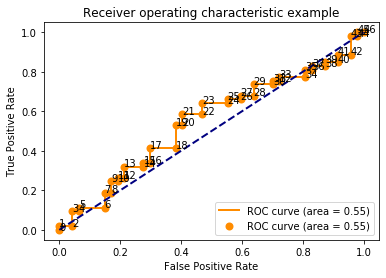

len(fpr): 54
len(thresholds): 54
auc: 0.4294720252167061
max(thresholds): 1.98374706848578
max(nar_preds) +1: 1.98374706848578
TF: True


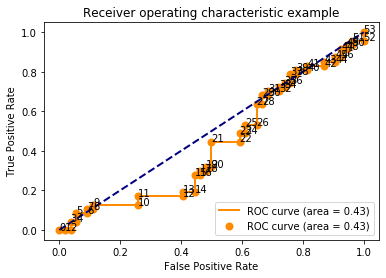

len(fpr): 62
len(thresholds): 62
auc: 0.4998029168309027
max(thresholds): 1.9929320733601061
max(nar_preds) +1: 1.9929320733601061
TF: True


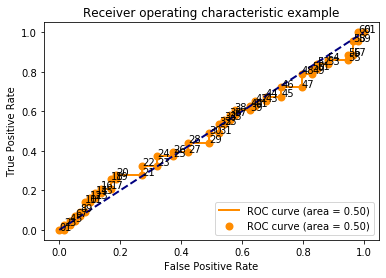

len(fpr): 55
len(thresholds): 55
auc: 0.4662878787878788
max(thresholds): 1.9964032537594683
max(nar_preds) +1: 1.9964032537594683
TF: True


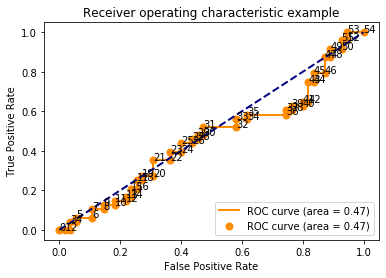

len(fpr): 62
len(thresholds): 62
auc: 0.42444444444444446
max(thresholds): 1.9976293098404598
max(nar_preds) +1: 1.9976293098404598
TF: True


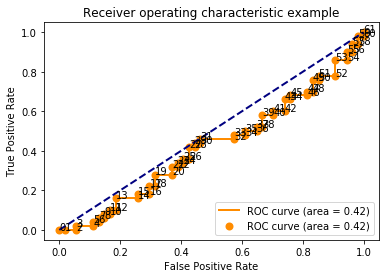

In [18]:
import time
from IPython.display import clear_output
for i in range(5):
    # time.sleep(1)
    # clear_output()
    int_size = i + 100
    nar_preds = np.random.random(int_size)
    # nar_preds = nar_preds[np.argsort(-nar_preds)]
    nar_labels = np.sort(np.random.randint(2,size=int_size))
    show_ROC(nar_labels, nar_preds)    

# 제출했던 csv 파일의 auc 계산

In [0]:
import pandas as pd

In [20]:
import pandas as pd
df_sub = pd.read_csv('/content/drive/My Drive/금융문자/submissions/submitted_csv/[csw]_auc950259_s_200101_ep1(1)_X192_bs32_vacc.csv')
df_labels = pd.read_excel('/content/drive/My Drive/금융문자/human_m.xlsx')
df_labels

,id,machine,human
0,340000,0.000109,0
1,340001,0.000136,0
2,340002,0.000045,0
3,340003,0.000044,0
4,340004,0.000064,0
...,...,...,...
1621,341621,0.000152,0
1622,341622,0.000045,0
1623,341623,0.000044,0
1624,341624,0.005991,0


In [117]:
df_labels['human'].values

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
show_ROC([0,0.5,1], [0,1,1])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-119-ae553ca3641e>", line 1, in <module>
    show_ROC([0,0.5,1], [0,1,1])
  File "<ipython-input-86-5f4419edc68b>", line 4, in show_ROC
    roc_auc = auc(fpr, tpr)
TypeError: 'numpy.float64' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, num

TypeError: ignored

In [127]:
type(df_sub['smishing'].values[0])

numpy.float64

In [124]:
df_labels['human'].apply(lambda x: int(x)).values
df_sub['smishing'].apply(lambda x: float(x)).values

array([4.26537270e-04, 2.14762310e-03, 6.45558175e-05, ...,
       5.25454852e-05, 7.57312635e-04, 2.80933036e-03])

len(fpr): 62
len(thresholds): 62
auc: 0.42444444444444446
max(thresholds): 1.9976293098404598
max(nar_preds) +1: 1.9976293098404598
TF: True


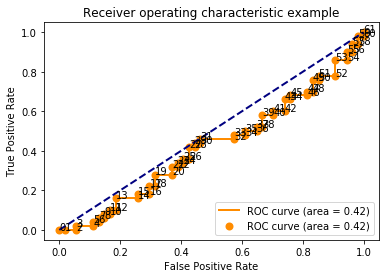

In [21]:
show_ROC(df_labels['human'].values, df_sub['smishing'].values)

In [35]:
import os
os.chdir('/content/drive/My Drive/금융문자/submissions/submitted_csv')
import glob
glob.glob('*.csv')

['[syh]_s200107_Bilstm_binaryCE_epoch1840_acc0.9246.csv',
 '[ksa]_191228_SKTBert_proto_auc41(vacc93).csv',
 '[syh]_lstm_len(1)_auc_30.csv',
 '[syh]_lstm_with_word2vec_len(1)_auc_78.csv',
 '[syh]_lstm_with_word2vec_auc_78.csv',
 '[syh]_tfidf_multiNB_auc88.csv',
 '[ksa]_191228sat01_ep1_vacc1_maxlen128_batch32(auc928).csv',
 's_191229_ep0.54_maxlen512_batchsize4_vacc100.csv',
 '[csw]_auc813s_191229_ep0.54_maxlen512_batchsize4_vacc100.csv',
 '[kym]_auc637_191228_svm_tf-idf(diff_auc93_15ea).csv',
 '[csw]_auc93_191228sat02_ep1a_maxlen128_batchsize32._vacc1.csv',
 '[csw]_s_191230_ep2_X512_bs8_vacc994079.csv',
 '[syh]_auc764_191230_lstm_with_word2vec_trainingdata30K_2layer.csv',
 '[csw]_auc886_s_191230_ep1.13_X128_randSam_bs32_vacc997894.csv',
 '[csw]_auc907788_s_191231_ep1to4(1)_sam30KprepSEP_X192_bs32_vacc996381.csv',
 '[csw]_auc934506_s_191231_ep1to4(1.58)_sam30KprepSEP_X192_bs32_vacc.csv',
 '[syh]_advertising_1.csv',
 '[csw]_auc950259_s_200101_ep1(1)_X192_bs32_vacc.csv',
 '[csw]_auc948094_

[syh]_s200107_Bilstm_binaryCE_epoch1840_acc0.9246.csv
len(fpr): 307
len(thresholds): 307
auc: 0.7545364595826337
max(thresholds): 1.9996064
max(nar_preds) +1: 1.9976293098404598
TF: False


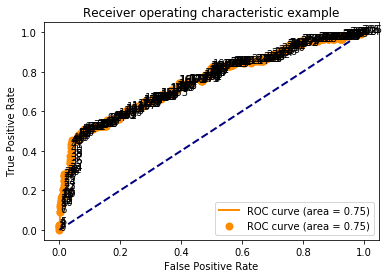

[ksa]_191228_SKTBert_proto_auc41(vacc93).csv


0            NaN
1       0.002298
2       0.002293
3       0.002308
4       0.002301
          ...   
1622    0.002308
1623    0.002301
1624    0.002301
1625    0.002314
1626    0.002295
Name: smishing, Length: 1627, dtype: float64

[syh]_lstm_len(1)_auc_30.csv
len(fpr): 296
len(thresholds): 296
auc: 0.33609378747901175
max(thresholds): 1.9999566999999998
max(nar_preds) +1: 1.9976293098404598
TF: False


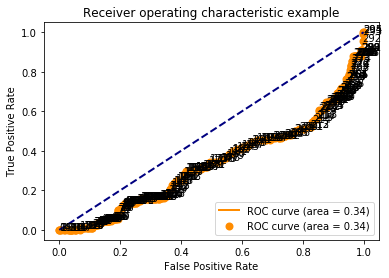

[syh]_lstm_with_word2vec_len(1)_auc_78.csv
len(fpr): 390
len(thresholds): 390
auc: 0.7713480450947471
max(thresholds): 1.9999414
max(nar_preds) +1: 1.9976293098404598
TF: False


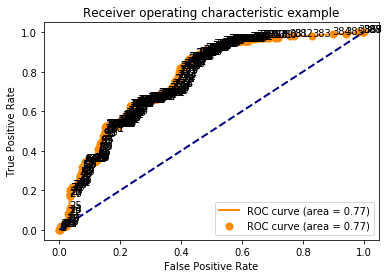

[syh]_lstm_with_word2vec_auc_78.csv
len(fpr): 62
len(thresholds): 62
auc: 0.7194860877908371
max(thresholds): 1.9999987
max(nar_preds) +1: 1.9976293098404598
TF: False


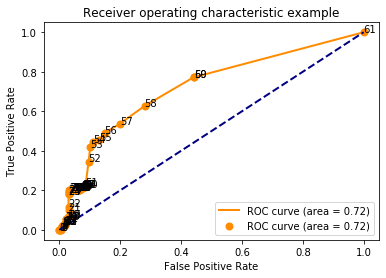

[syh]_tfidf_multiNB_auc88.csv
len(fpr): 301
len(thresholds): 301
auc: 0.9128927800431759
max(thresholds): 1.9970914929630745
max(nar_preds) +1: 1.9976293098404598
TF: False


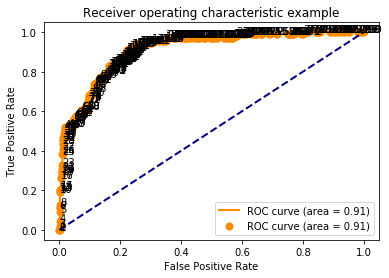

[ksa]_191228sat01_ep1_vacc1_maxlen128_batch32(auc928).csv
len(fpr): 264
len(thresholds): 264
auc: 0.8946210122331493
max(thresholds): 1.9940447211265564
max(nar_preds) +1: 1.9976293098404598
TF: False


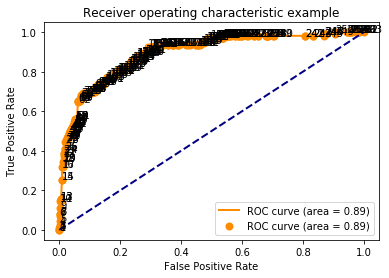

s_191229_ep0.54_maxlen512_batchsize4_vacc100.csv
len(fpr): 276
len(thresholds): 276
auc: 0.855834732549772
max(thresholds): 1.9988023042678833
max(nar_preds) +1: 1.9976293098404598
TF: False


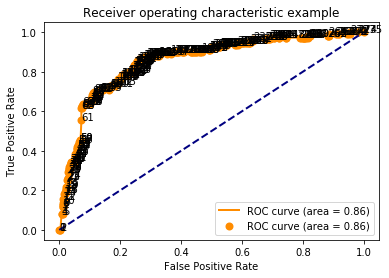

[csw]_auc813s_191229_ep0.54_maxlen512_batchsize4_vacc100.csv
len(fpr): 276
len(thresholds): 276
auc: 0.855834732549772
max(thresholds): 1.9988023042678833
max(nar_preds) +1: 1.9976293098404598
TF: False


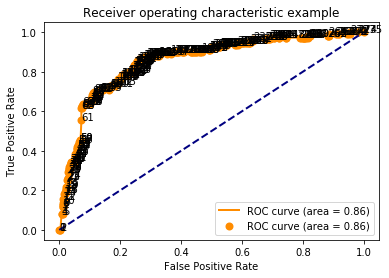

[kym]_auc637_191228_svm_tf-idf(diff_auc93_15ea).csv
len(fpr): 3
len(thresholds): 3
auc: 0.7437335092348285
max(thresholds): 2
max(nar_preds) +1: 1.9976293098404598
TF: False


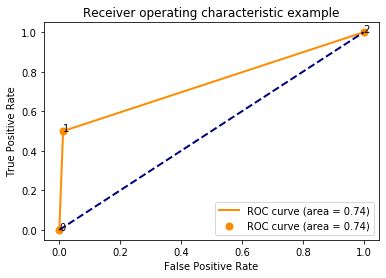

[csw]_auc93_191228sat02_ep1a_maxlen128_batchsize32._vacc1.csv
len(fpr): 244
len(thresholds): 244
auc: 0.8972355480930678
max(thresholds): 1.9995717406272888
max(nar_preds) +1: 1.9976293098404598
TF: False


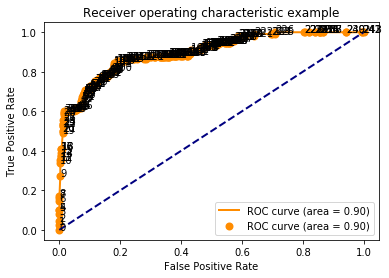

[csw]_s_191230_ep2_X512_bs8_vacc994079.csv
len(fpr): 262
len(thresholds): 262
auc: 0.8615975053969778
max(thresholds): 1.999846875667572
max(nar_preds) +1: 1.9976293098404598
TF: False


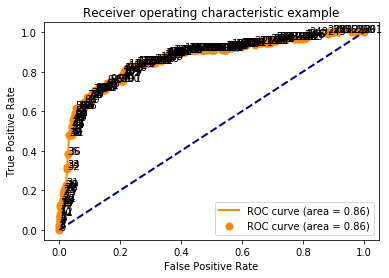

[syh]_auc764_191230_lstm_with_word2vec_trainingdata30K_2layer.csv
len(fpr): 434
len(thresholds): 434
auc: 0.6368943391700648
max(thresholds): 1.97306234
max(nar_preds) +1: 1.9976293098404598
TF: False


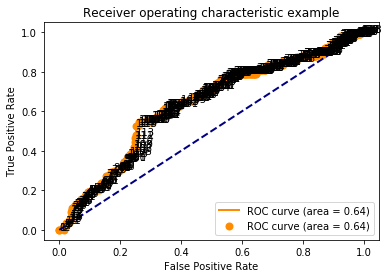

[csw]_auc886_s_191230_ep1.13_X128_randSam_bs32_vacc997894.csv
len(fpr): 264
len(thresholds): 264
auc: 0.8777164787718879
max(thresholds): 1.9995186924934387
max(nar_preds) +1: 1.9976293098404598
TF: False


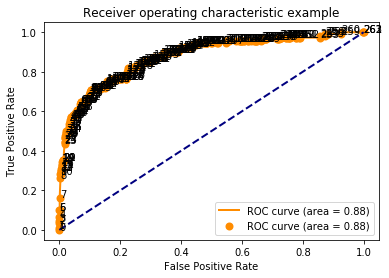

[csw]_auc907788_s_191231_ep1to4(1)_sam30KprepSEP_X192_bs32_vacc996381.csv
len(fpr): 287
len(thresholds): 287
auc: 0.8868073878627968
max(thresholds): 1.9984721541404724
max(nar_preds) +1: 1.9976293098404598
TF: False


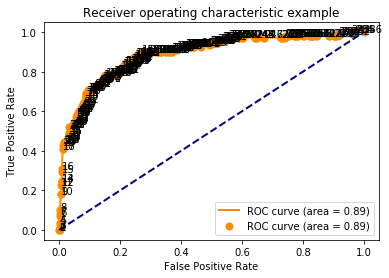

[csw]_auc934506_s_191231_ep1to4(1.58)_sam30KprepSEP_X192_bs32_vacc.csv
len(fpr): 279
len(thresholds): 279
auc: 0.885110338210602
max(thresholds): 1.9995414018630981
max(nar_preds) +1: 1.9976293098404598
TF: False


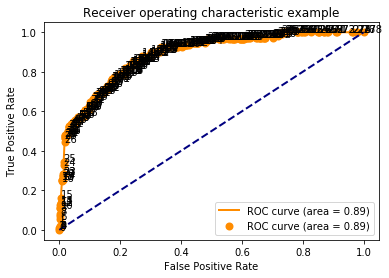

[syh]_advertising_1.csv
len(fpr): 3
len(thresholds): 3
auc: 0.7340309426721036
max(thresholds): 2
max(nar_preds) +1: 1.9976293098404598
TF: False


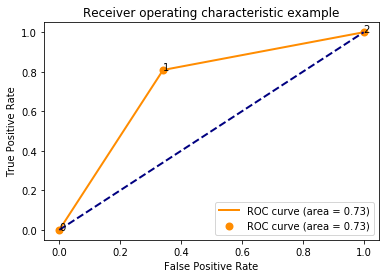

[csw]_auc950259_s_200101_ep1(1)_X192_bs32_vacc.csv
len(fpr): 223
len(thresholds): 223
auc: 0.9054509474694172
max(thresholds): 1.999843955039978
max(nar_preds) +1: 1.9976293098404598
TF: False


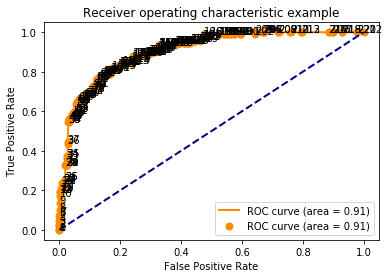

[csw]_auc948094_s_200101_ep1.16_X192_bs32_vacc.csv
len(fpr): 225
len(thresholds): 225
auc: 0.8947289517869993
max(thresholds): 1.9991939663887024
max(nar_preds) +1: 1.9976293098404598
TF: False


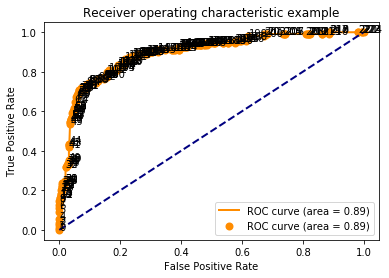

[csw]_auc948094_s_191230_ep2_X512_tX512_bs8_vacc994.csv
len(fpr): 181
len(thresholds): 181
auc: 0.8614775725593669
max(thresholds): 1.9998493194580078
max(nar_preds) +1: 1.9976293098404598
TF: False


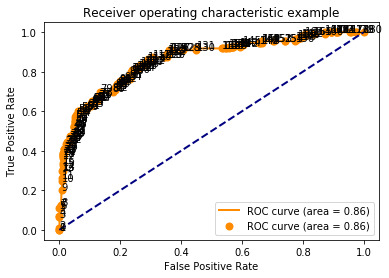

[csw]_auc950259_s_191231_ep1(ep1.58,23;45)_sam30KprepSEP_X192_tX192_bs32_vacc.csv
len(fpr): 260
len(thresholds): 260
auc: 0.8906812185176302
max(thresholds): 1.9995701909065247
max(nar_preds) +1: 1.9976293098404598
TF: False


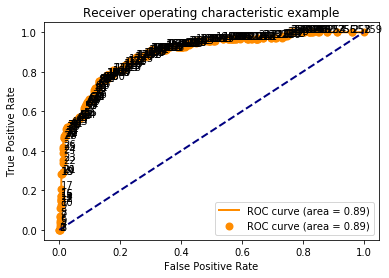

[kym]_s_200102_[moon,wedd,e-mart]_emart_01.02.csv
len(fpr): 278
len(thresholds): 278
auc: 0.8903693931398416
max(thresholds): 1.999711071
max(nar_preds) +1: 1.9976293098404598
TF: False


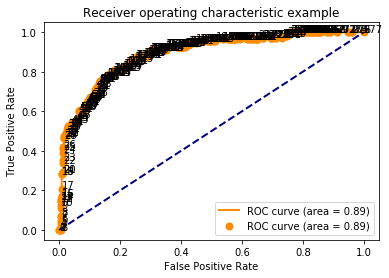

Bilstm_no_word2vec_epoch90_acc0.6094.csv
len(fpr): 303
len(thresholds): 303
auc: 0.7367923962580955
max(thresholds): 1.5834988
max(nar_preds) +1: 1.9976293098404598
TF: False


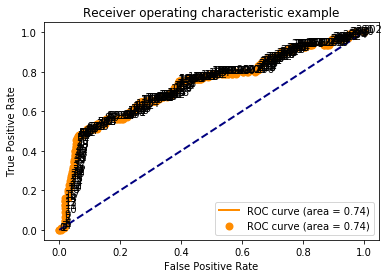

[kym]_s_191231_aug93_human_augment_상관없이_1minus.csv
len(fpr): 253
len(thresholds): 253
auc: 0.8909690573278963
max(thresholds): 1.9999081773203216
max(nar_preds) +1: 1.9976293098404598
TF: False


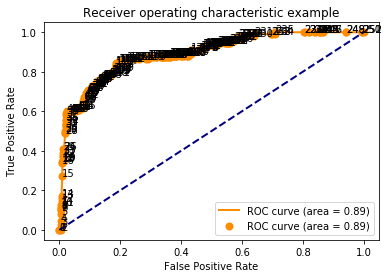

[csw]_auc924762_s_200104_ep1_1137_X256tX256_bs24_vacc997375.csv
len(fpr): 208
len(thresholds): 208
auc: 0.8688504437514991
max(thresholds): 1.995962917804718
max(nar_preds) +1: 1.9976293098404598
TF: False


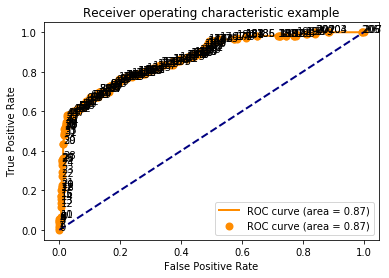

[csw]_auc921241_s_200104_ep1_569_X256tX256_bs24_vacc.csv
len(fpr): 200
len(thresholds): 200
auc: 0.8719926840969057
max(thresholds): 1.9990113377571106
max(nar_preds) +1: 1.9976293098404598
TF: False


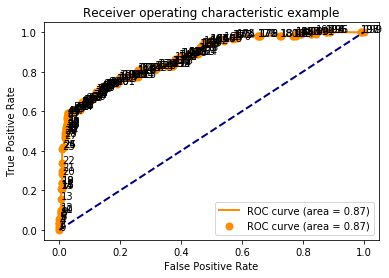

[csw]_auc893043s_200104_ep0_1137_X256tX256_bs24_vacc952380.csv
len(fpr): 207
len(thresholds): 207
auc: 0.872160590069561
max(thresholds): 1.9847044348716736
max(nar_preds) +1: 1.9976293098404598
TF: False


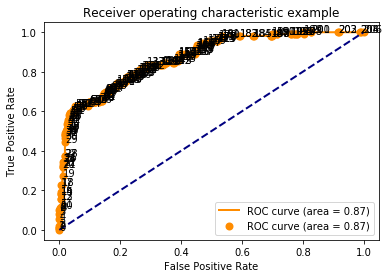

[csw]_auc876168_s_200104_ep0_569_X256tX256_bs24_vacc.csv
len(fpr): 212
len(thresholds): 212
auc: 0.8607130007195971
max(thresholds): 1.5997792482376099
max(nar_preds) +1: 1.9976293098404598
TF: False


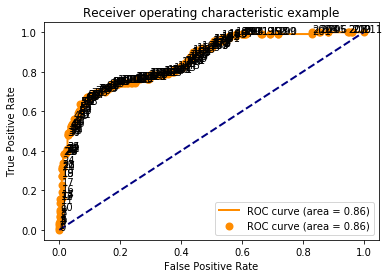

[syh]_auc828864_s200105_Bilstm_binaryCE_epoch230_acc0.6850.csv
len(fpr): 314
len(thresholds): 314
auc: 0.743322739266011
max(thresholds): 1.7037054999999999
max(nar_preds) +1: 1.9976293098404598
TF: False


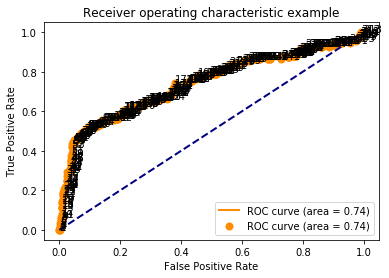

[syh]_auc819421_s200104_Bilstm_focalloss_epoch643_acc0.8690.csv
len(fpr): 284
len(thresholds): 284
auc: 0.7451816982489806
max(thresholds): 1.7106675500000001
max(nar_preds) +1: 1.9976293098404598
TF: False


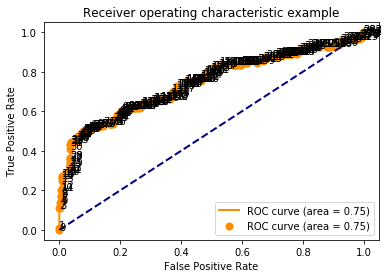

In [36]:
for idx, path in enumerate(glob.glob('*.csv')):
    # if idx==5:
    #     break
    print(path)
    df_sub = pd.read_csv(path)
    try:
        show_ROC(df_labels['human'].values, df_sub['smishing'].values)
    except:
        display(df_sub['smishing'])
